Import libraries

In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Convolution2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
 
%matplotlib inline

Define variables

In [59]:
# Train data
train_dir = 'classification_data/train'
# Test data
test_dir = 'classification_data/test'
# Image size
img_width, img_height = 521, 521
# Tensor dimensions
input_shape = (img_width, img_height, 3)
# Epoches
epochs = 30
# Batch size
batch_size = 16
# Train samples
nb_train_samples = 19164
# Test samples
nb_test_samples = 3000

Create the model.

In [60]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


Compile the model.

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Create data generator for images.

In [62]:
datagen = ImageDataGenerator(rescale=1. / 255)


Create a train dataset.

In [63]:

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 19164 images belonging to 2 classes.


Create a test dataset.

In [64]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 2 classes.


Create a validation dataset.

Fit the model.

In [65]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/30
1197/1197 [==============================] - 153s - loss: 0.6398 - acc: 0.6327 - val_loss: 0.6516 - val_acc: 0.6039
Epoch 2/30
1197/1197 [==============================] - 152s - loss: 0.5885 - acc: 0.6937 - val_loss: 0.6193 - val_acc: 0.6632
Epoch 3/30
1197/1197 [==============================] - 120s - loss: 0.5529 - acc: 0.7199 - val_loss: 0.5894 - val_acc: 0.6914
Epoch 4/30
1197/1197 [==============================] - 118s - loss: 0.5081 - acc: 0.7522 - val_loss: 0.5427 - val_acc: 0.7141
Epoch 5/30
1197/1197 [==============================] - 118s - loss: 0.4594 - acc: 0.7788 - val_loss: 0.5139 - val_acc: 0.7386
Epoch 6/30
1197/1197 [==============================] - 118s - loss: 0.4109 - acc: 0.8053 - val_loss: 0.4633 - val_acc: 0.7735
Epoch 7/30
1197/1197 [==============================] - 118s - loss: 0.3691 - acc: 0.8284 - val_loss: 0.4138 - val_acc: 0.8097
Epoch 8/30
1197/1197 [==============================] - 118s - loss: 0.3372 - acc: 0.8454 - val_loss: 0.3934 - 

In [58]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

print("Test data accuracy: %.2f%%" % (scores[1]*100))

Test data accuracy: 95.55%


Plot the history of model fitting.

In [66]:
def plot_history(history):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,7))
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')
    
    
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')

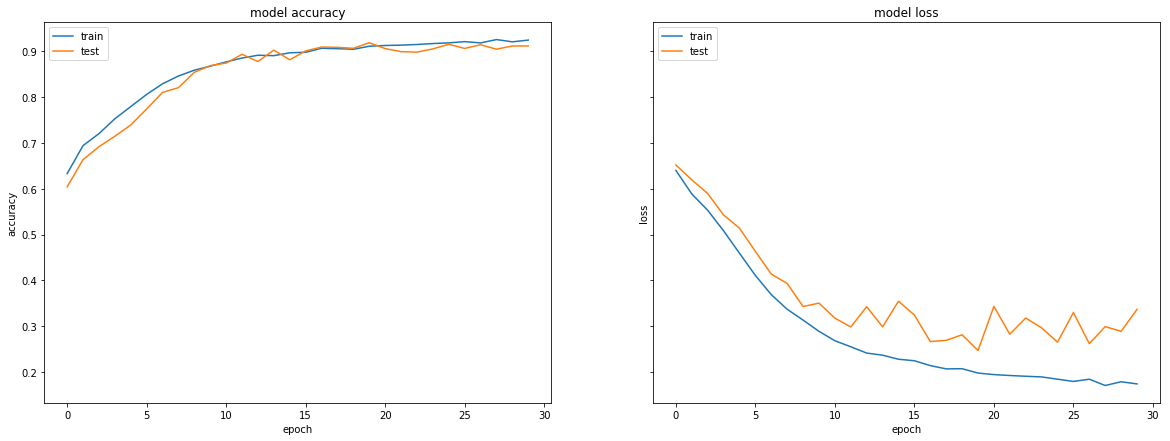

In [67]:
plot_history(history)